In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [39]:
ds = pd.read_csv("../data/data.csv", index_col=False)

# Первинний аналіз даних

## Огляд датасету

In [40]:
print('Dataset size - ', ds.shape)

Dataset size -  (2772, 7)


In [41]:
display(ds.head(10))

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [42]:
ds.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

## Відсутні дані у колонках

In [43]:
for col in ds.columns:
    if ds[col].isnull().values.any():
        print(col, ": Found missing data")

## Загальний опис даних

In [44]:
ds.describe()

,age,bmi,children,charges
count,2772.000000,2772.000000,2772.000000,2772.000000
mean,39.109668,30.701349,1.101732,13261.369959
std,14.081459,6.129449,1.214806,12151.768945
min,18.000000,15.960000,0.000000,1121.873900
25%,26.000000,26.220000,0.000000,4687.797000
50%,39.000000,30.447500,1.000000,9333.014350
75%,51.000000,34.770000,2.000000,16577.779500
max,64.000000,53.130000,5.000000,63770.428010


In [45]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       2772 non-null   int64  
 1   sex       2772 non-null   object 
 2   bmi       2772 non-null   float64
 3   children  2772 non-null   int64  
 4   smoker    2772 non-null   object 
 5   region    2772 non-null   object 
 6   charges   2772 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 151.7+ KB


## Визначимо найважливіші характеристики

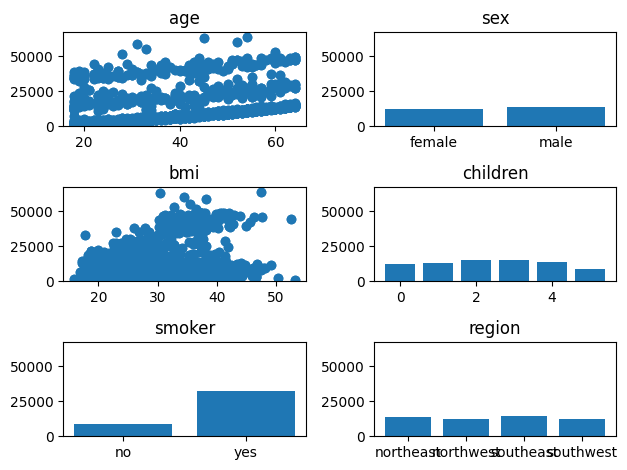

In [46]:
fig, axs = plt.subplots(3, 2)
axs[0, 0].scatter(ds["age"],ds["charges"])
axs[0, 0].set_title("age")
dat = ds.groupby('sex')['charges'].mean()
axs[0, 1].bar(dat.index, dat.values)
axs[0, 1].set_title("sex")
axs[0, 1].sharey(axs[0, 0])
axs[1, 0].scatter(ds["bmi"],ds["charges"])
axs[1, 0].set_title("bmi")
axs[1, 0].sharey(axs[0, 1])
dat = ds.groupby('children')['charges'].mean()
axs[1, 1].bar(dat.index, dat.values)
axs[1, 1].set_title("children")
axs[1, 1].sharey(axs[1, 0])
dat = ds.groupby('smoker')['charges'].mean()
axs[2, 0].bar(dat.index, dat.values)
axs[2, 0].set_title("smoker")
axs[2, 0].sharey(axs[1, 1])
dat = ds.groupby('region')['charges'].mean()
axs[2, 1].bar(dat.index, dat.values)
axs[2, 1].set_title("region")
axs[2, 1].sharey(axs[2, 0])
fig.tight_layout()

## Перевірка збалансованості

In [47]:
categorial = ['smoker', 'region', 'sex']

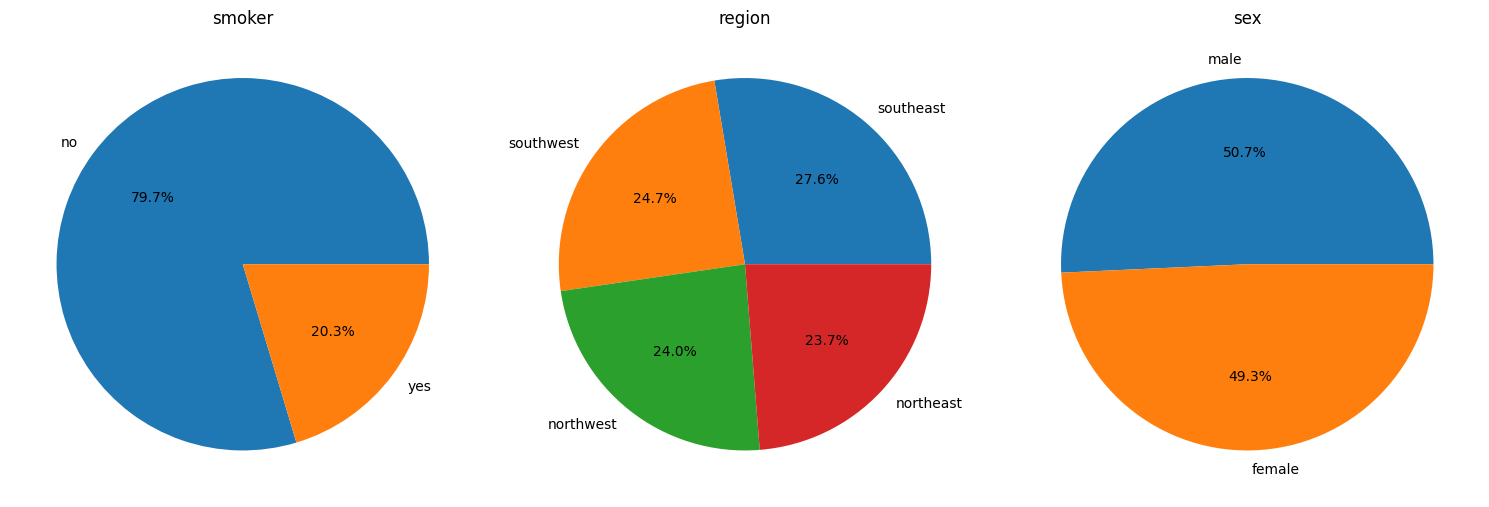

In [48]:
fig, axes = plt.subplots(1, len(categorial), figsize=(5 * len(categorial), 5))
    
for ax, column in zip(axes, categorial):
    value_counts = ds[column].value_counts()
    ax.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%')
    ax.set_title(column)

plt.tight_layout()
plt.show()

# Опрацювання даних

In [49]:
numerical = ['age', 'bmi', 'children']

## Кодування категоріальних ознак

In [50]:
ordinal_cols = [col for col in categorial if ds[col].nunique() == 2]
one_hot_cols = [col for col in categorial if ds[col].nunique() > 2]
print(ordinal_cols)
print(one_hot_cols)

['smoker', 'sex']
['region']


In [51]:
def encode_ordinal(df, col):
    mappings = df[col].value_counts().index.tolist()
    mappings = {k: i for i, k in enumerate(mappings)}
    df[col] = df[col].map(mappings)

# let's encode ordinal variables
for col in ordinal_cols:
    encode_ordinal(ds, col)

In [52]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse_output=False)

for col in one_hot_cols:
  ds[col] = ds[col].astype('str')

ohe.fit(ds[one_hot_cols])
ohe_output = ohe.transform(ds[one_hot_cols])
ohe_output = pd.DataFrame(ohe_output)
ohe_output.columns = ohe.get_feature_names_out(one_hot_cols)

In [53]:
ds = ds.reset_index(drop=True)
ds = ds.drop(one_hot_cols, axis=1)
ds = pd.concat([ds, ohe_output], axis=1)

In [54]:
ds

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,1,27.900,0,1,16884.92400,0.0,0.0,0.0,1.0
1,18,0,33.770,1,0,1725.55230,0.0,0.0,1.0,0.0
2,28,0,33.000,3,0,4449.46200,0.0,0.0,1.0,0.0
3,33,0,22.705,0,0,21984.47061,0.0,1.0,0.0,0.0
4,32,0,28.880,0,0,3866.85520,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
2767,47,1,45.320,1,0,8569.86180,0.0,0.0,1.0,0.0
2768,21,1,34.600,0,0,2020.17700,0.0,0.0,0.0,1.0
2769,19,0,26.030,1,1,16450.89470,0.0,1.0,0.0,0.0
2770,23,0,18.715,0,0,21595.38229,0.0,1.0,0.0,0.0


## Видалення аномалій

In [55]:
def find_skewed_boundaries(ds, variable, distance):
    IQR = ds[variable].quantile(0.75) - ds[variable].quantile(0.25)

    lower_boundary = ds[variable].quantile(0.25) - (IQR * distance)
    upper_boundary = ds[variable].quantile(0.75) + (IQR * distance)

    return upper_boundary, lower_boundary

In [56]:
for col in numerical:
   upper_limit, lower_limit = find_skewed_boundaries(ds, col, 4)
   print(f"{col} - ({upper_limit},{lower_limit})")
   outliers_Duration = np.where(ds[col] > upper_limit, True,
                       np.where(ds[col] < lower_limit, True, False))
   ds = ds.loc[~outliers_Duration, ]

age - (151.0,-74.0)
bmi - (68.97000000000003,-7.980000000000018)
children - (10.0,-8.0)


## Стандартизація

In [57]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(ds[numerical])

scaled = pd.DataFrame(scaler.transform(ds[numerical]), columns=numerical)
ds = ds.drop(numerical, axis=1)
ds = pd.concat([ds, scaled], axis=1)

# Формування поділу датасету

In [58]:
from sklearn.model_selection import train_test_split
X_train, X_rem, Y_train, Y_rem = train_test_split(ds.drop('charges', axis=1),ds['charges'], train_size=0.6)

# Тренування моделі

## Вибір найефективнішої регресійної моделі

In [59]:
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor 

models = {
    'Neural Network Regression': MLPRegressor(verbose=0),
    'Random Forest Regression': RandomForestRegressor(),
    'XBG Regression': XGBRegressor(verbose=0),
    'KNeighbours Regression': KNeighborsRegressor(),
    'Gradient Boosting Regression': GradientBoostingRegressor(verbose=0),
    'DecisionTree Regression': DecisionTreeRegressor()
}

In [60]:
import sklearn.metrics as metrics

def fit_predict_score(model, X_train, Y_train, X_valid, Y_valid):
    model.fit(X_train, Y_train)
    Y_pred = np.round(model.predict(X_valid.values))
    return metrics.mean_absolute_percentage_error(Y_valid, Y_pred), metrics.mean_squared_error(Y_valid, Y_pred)

def measure_models(model, X_train, Y_train, X_valid, Y_valid):
    results = {'Model': [], 'MSE': [], 'MAPE': []}
    for model_n, model in models.items():
        print(model.get_params())
        mape, mse = fit_predict_score(model, X_train, Y_train, X_valid, Y_valid)
        results['Model'].append(model_n)
        results['MSE'].append(mse)
        results['MAPE'].append(mape)
    return pd.DataFrame(results)

In [61]:
results = measure_models(models, X_train, Y_train, X_rem, Y_rem)
results

{'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (100,), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': None, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}


C:\Users\vasyl\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\vasyl\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 1.0, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}
{'objective': 'reg:squarederror', 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': None, 'device': None, 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': None, 'feature_types': None, 'gamma': None, 'grow_policy': None, 'importance_type': None, 'interaction_constraints': None, 'learning_rate': None, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_depth': None, 'max_leaves': None, 'min_child_weight': None, 'missing': nan, 'monotone_constrai

C:\Users\vasyl\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\vasyl\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\xgboost\core.py:160: UserWarning: [21:59:22] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "verbose" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\vasyl\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
C:\Users\vasyl\AppData\Local\Pa

,Model,MSE,MAPE
0,Neural Network Regression,2.971471e+08,0.828521
1,Random Forest Regression,1.113857e+07,0.201969
2,XBG Regression,1.049089e+07,0.197401
3,KNeighbours Regression,4.213055e+07,0.334921
4,Gradient Boosting Regression,1.775280e+07,0.273968
5,DecisionTree Regression,1.878978e+07,0.147435


# Вибір найкращих гіперпараметрів

In [62]:
model = DecisionTreeRegressor(criterion='absolute_error')

In [63]:
from sklearn.model_selection import GridSearchCV

param_grid = { 'max_depth': [None, 5, 10, 20],
               'min_samples_split': [1, 2, 3, 5],
               'min_samples_leaf': [1, 2, 4],
                "max_leaf_nodes": [None, 5, 20, 100],
}

grid = GridSearchCV(estimator=model,
                    param_grid=param_grid,
                    cv=5,
                    return_train_score=True)

grid.fit(X_train, Y_train)

print("The best parameters are %s with a score of %0.2f"
      % (grid.best_params_, grid.best_score_))

The best parameters are {'max_depth': 20, 'max_leaf_nodes': None, 'min_samples_leaf': 1, 'min_samples_split': 2} with a score of 0.88


C:\Users\vasyl\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
240 fits failed out of a total of 960.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
240 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\vasyl\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\vasyl\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-p

In [64]:
model = DecisionTreeRegressor(max_depth=None, min_samples_leaf=1, min_samples_split=2)
mape, mse = fit_predict_score(model, X_train, Y_train, X_rem, Y_rem)
print("MAPE: ",mape," MSE: ",mse)

MAPE:  0.14661576643458274  MSE:  18737039.57262647


C:\Users\vasyl\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


# Аналіз важливості ознак

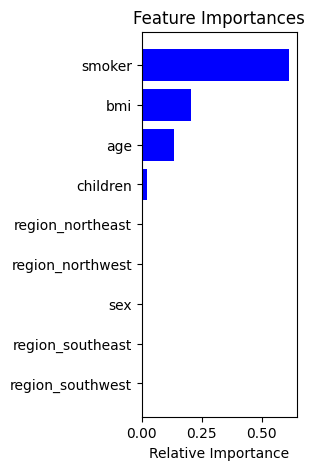

In [65]:
rf = models['Random Forest Regression']
importance = rf.feature_importances_
indices = np.argsort(importance)
plt.figure(figsize=(2, 5))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importance[indices], color='b', align='center')
plt.yticks(range(len(indices)), [X_train.columns[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()